In [1]:
import pandas as pds 
import subprocess
import json
import matplotlib.pyplot as plt
import numpy as np

def get_experiments_from_path(start_path):
    experiment_dot_json_paths = subprocess.getoutput('find {} | grep experiment.json'.format(start_path))

    experiment_dot_json_paths = experiment_dot_json_paths.split('\n')
    experiments = []
    for p in experiment_dot_json_paths:
        with open(p) as f:
            experiments.append(json.load(f))
    
    return experiments

# CORES Dataset, CNN, One source Domain

In [2]:
cores_cnn_3_raw = get_experiments_from_path("../cores_cnn_3")

print("parameters", cores_cnn_3_raw[0]["parameters"].keys())
print("results", cores_cnn_3_raw[0]["results"].keys())

parameters dict_keys(['experiment_name', 'lr', 'device', 'seed', 'dataset_seed', 'desired_classes', 'batch_size', 'n_epoch', 'patience', 'criteria_for_best', 'normalize_source', 'normalize_target', 'x_net', 'NUM_LOGS_PER_EPOCH', 'RESULTS_DIR', 'EXPERIMENT_JSON_PATH', 'LOSS_CURVE_PATH', 'BEST_MODEL_PATH', 'num_examples_per_class_per_domain', 'source_domains', 'target_domains'])
results dict_keys(['source_test_label_accuracy', 'source_test_label_loss', 'target_test_label_accuracy', 'target_test_label_loss', 'source_val_label_accuracy', 'source_val_label_loss', 'target_val_label_accuracy', 'target_val_label_loss', 'total_epochs_trained', 'total_experiment_time_secs', 'confusion', 'per_domain_accuracy'])


In [3]:
cores_cnn_3_processed = []

for e in cores_cnn_3_raw:
    p = {}
    p["experiment_name"]  = e["experiment_name"]
    p["source_domains"]  = str(e["parameters"]["source_domains"])
    # p["per_domain_accuracy"]  = e["results"]["per_domain_accuracy"]
    for domain,accuracy in e["results"]["per_domain_accuracy"].items():
        p[domain.format(domain)] = accuracy["accuracy"]
    
    
    cores_cnn_3_processed.append(p)

df = pds.DataFrame(cores_cnn_3_processed)

In [4]:
df = df.groupby("source_domains").mean()
df

,2,5,3,4,1
source_domains,,,,,
[1],0.490848,0.425319,0.463626,0.437788,0.983678
[2],0.983678,0.707782,0.847953,0.760138,0.484152
[3],0.809825,0.743786,0.977241,0.739862,0.491071
[4],0.788772,0.698955,0.729032,0.972874,0.442411
[5],0.714152,0.984828,0.737558,0.691754,0.446429


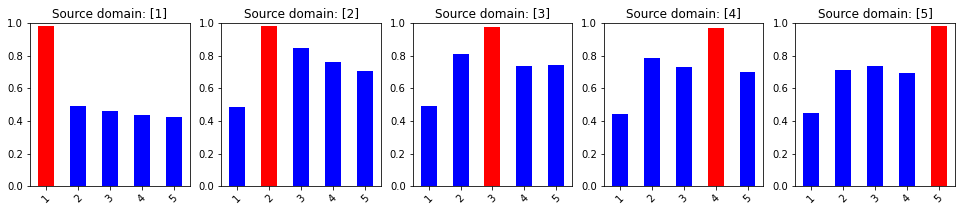

In [5]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 3]

domain_colors = {True: 'r', False: 'b'}
for i, (name, row) in enumerate(df.iterrows()):
    row = row.sort_index()
    ax = plt.subplot(1,6, i+1)
    ax.set_title("Source domain: {}".format(name))
    ax.set_ylim([0.0, 1.0])
    
    source_indices = eval(name)
    row.plot(kind="bar", ax=ax, color=[domain_colors[int(domain) in source_indices] for domain in row.index])
    plt.xticks(rotation=45)

# CORES, PTN, One source domain

In [6]:
raw = get_experiments_from_path("../cores_ptn_1")
processed = []

for e in raw:
    p = {}
    p["experiment_name"]  = e["experiment_name"]
    p["source_domains"]  = str(e["parameters"]["source_domains"])
    # p["per_domain_accuracy"]  = e["results"]["per_domain_accuracy"]
    for domain,accuracy in e["results"]["per_domain_accuracy"].items():
        p[domain.format(domain)] = accuracy["accuracy"]
    
    
    processed.append(p)

df = pds.DataFrame(processed)
df

,experiment_name,source_domains,5,1,2,3,4
0,cores_ptn_1,[5],0.998563,0.984195,0.965517,0.972701,0.936782
1,cores_ptn_1,[5],0.982759,0.948276,0.962644,0.926724,0.931034
2,cores_ptn_1,[2],0.897989,0.919540,0.978448,0.952586,0.880747
3,cores_ptn_1,[1],0.926724,0.979885,0.936782,0.945402,0.880747
4,cores_ptn_1,[2],0.932471,0.913793,0.984195,0.959770,0.915230
5,cores_ptn_1,[1],0.958333,0.989943,0.938218,0.922414,0.912356
6,cores_ptn_1,[4],0.971264,0.956897,0.974138,0.965517,0.989943
7,cores_ptn_1,[3],0.932471,0.958333,0.945402,0.987069,0.902299
8,cores_ptn_1,[1],0.929598,0.987069,0.932471,0.933908,0.910920
9,cores_ptn_1,[3],0.961207,0.966954,0.962644,0.994253,0.955460


In [7]:
df = df.groupby("source_domains").mean()
df

,5,1,2,3,4
source_domains,,,,,
[1],0.939368,0.984770,0.938793,0.934483,0.902874
[2],0.925000,0.921839,0.985920,0.956034,0.895402
[3],0.940805,0.958333,0.965517,0.990805,0.929885
[4],0.979023,0.971839,0.978736,0.977011,0.987644
[5],0.989080,0.962356,0.969828,0.949425,0.928448


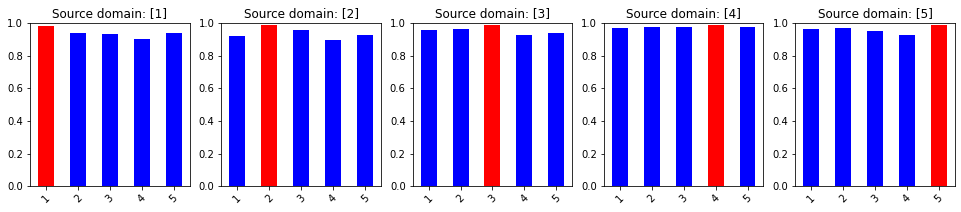

In [8]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 3]

domain_colors = {True: 'r', False: 'b'}
for i, (name, row) in enumerate(df.iterrows()):
    row = row.sort_index()
    ax = plt.subplot(1,6, i+1)
    ax.set_title("Source domain: {}".format(name))
    ax.set_ylim([0.0, 1.0])
    
    source_indices = eval(name)
    row.plot(kind="bar", ax=ax, color=[domain_colors[int(domain) in source_indices] for domain in row.index])
    plt.xticks(rotation=45)

# ORACLE Dataset, CNN, One source Domain

In [16]:
raw = get_experiments_from_path("../oracle_cnn_1")
processed = []

for e in raw:
    p = {}
    p["experiment_name"]  = e["experiment_name"]
    p["source_domains"]  = str(e["parameters"]["source_domains"])
    p["num_examples_per_class_per_domain"] = e["parameters"]["num_examples_per_class_per_domain"]
    
    for domain,accuracy in e["results"]["per_domain_accuracy"].items():
        p[domain.format(domain)] = accuracy["accuracy"]
    
    
    processed.append(p)

df = pds.DataFrame(processed)
df_orig = df
df

,experiment_name,source_domains,num_examples_per_class_per_domain,38,14,26,32,62,8,50,2,44,20,56
0,oracle_cnn_1,[2],1000,0.057716,0.060316,0.062862,0.068080,0.061207,0.124388,0.060231,0.350000,0.065762,0.054561,0.064858
1,oracle_cnn_1,[20],1000,0.063847,0.002497,0.063466,0.063572,0.064076,0.061672,0.064890,0.055262,0.055158,0.361667,0.066296
2,oracle_cnn_1,[56],100,0.013333,0.068085,0.079365,0.043651,0.087121,0.048889,0.056277,0.045802,0.018100,0.068670,0.337500
3,oracle_cnn_1,[62],100,0.032000,0.057269,0.051064,0.077821,0.412500,0.083665,0.058333,0.034188,0.046025,0.064516,0.141553
4,oracle_cnn_1,[14],10000,0.059744,0.862875,0.094822,0.063159,0.063431,0.015189,0.078354,0.060409,0.061697,0.018127,0.060690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,oracle_cnn_1,[56],10000,0.000000,0.063292,0.062236,0.010398,0.080743,0.063681,0.126888,0.064527,0.001380,0.062327,0.967875
161,oracle_cnn_1,[14],10000,0.062967,0.870417,0.103237,0.064349,0.060932,0.007794,0.075780,0.059857,0.064618,0.016303,0.062761
162,oracle_cnn_1,[56],10000,0.009692,0.061836,0.062827,0.037986,0.074526,0.065928,0.112309,0.064976,0.009089,0.064158,0.967583
163,oracle_cnn_1,[26],10000,0.081875,0.115689,0.825250,0.000166,0.062266,0.063483,0.053062,0.061481,0.087805,0.062578,0.059241


In [10]:
# Extremely low accuracy on target domain 32
df[(df["num_examples_per_class_per_domain"] == 10000) & (df["source_domains"] == "[26]")]

,experiment_name,source_domains,num_examples_per_class_per_domain,38,14,26,32,62,8,50,2,44,20,56
22,oracle_cnn_1,[26],10000,0.039970,0.116557,0.834333,0.000042,0.061904,0.061637,0.061213,0.063225,0.064210,0.061725,0.063863
37,oracle_cnn_1,[26],10000,0.031403,0.119179,0.838292,0.000290,0.061484,0.061306,0.061759,0.064793,0.059164,0.061145,0.062428
121,oracle_cnn_1,[26],10000,0.055933,0.113010,0.829667,0.000000,0.063302,0.062759,0.061239,0.060770,0.061748,0.065160,0.061717
153,oracle_cnn_1,[26],10000,0.041594,0.120198,0.832875,0.000084,0.005571,0.060818,0.064066,0.063159,0.064087,0.061628,0.047208
163,oracle_cnn_1,[26],10000,0.081875,0.115689,0.825250,0.000166,0.062266,0.063483,0.053062,0.061481,0.087805,0.062578,0.059241


In [13]:
df_orig = df
df = df.groupby(["num_examples_per_class_per_domain", "source_domains"]).mean()
cols = df.columns.tolist()
cols.sort()
df.sort_index()
df = df[cols]
df

14         2  \
num_examples_per_class_per_domain source_domains                       
100                               [14]            0.241667  0.053223   
                                  [20]            0.007010  0.075231   
                                  [26]            0.074462  0.060613   
                                  [2]             0.056814  0.175833   
                                  [32]            0.058443  0.062290   
                                  [38]            0.061634  0.062664   
                                  [44]            0.072976  0.063412   
                                  [50]            0.062142  0.069828   
                                  [56]            0.057279  0.057674   
                                  [62]            0.065517  0.057464   
                                  [8]             0.047262  0.056425   
1000                              [14]            0.645917  0.062270   
                                  [20]            0.003582  0.063060   
                                  [26]            0.082646  0.063295   
                                  [2]             0.062650  0.345250   
                                  [32]            0.061126  0.062341   
                                  [38]            0.058182  0.061196   
                                  [44]            0.060104  0.060242   
                                  [50]            0.059359  0.063290   
                                  [56]            0.060259  0.062325   
                                  [62]            0.060017  0.061450   
                                  [8]             0.041755  0.060098   
10000                             [14]            0.867708  0.064895   
                                  [20]            0.007928  0.087345   
                                  [26]            0.116927  0.062685   
                                  [2]             0.077588  0.748975   
                                  [32]            0.016268  0.062341   
                                  [38]            0.095528  0.064364   
                                  [44]            0.067675  0.061607   
                                  [50]            0.064218  0.063347   
                                  [56]            0.062698  0.063333   
                                  [62]            0.062361  0.062114   
                                  [8]             0.064371  0.062363   

                                                        20        26  \
num_examples_per_class_per_domain source_domains                       
100                               [14]            0.030636  0.064673   
                                  [20]            0.126667  0.049581   
                                  [26]            0.070149  0.151667   
                                  [2]             0.058410  0.072987   
                                  [32]            0.066225  0.058191   
                                  [38]            0.066950  0.050097   
                                  [44]            0.066608  0.055218   
                                  [50]            0.068523  0.049448   
                                  [56]            0.064454  0.074014   
                                  [62]            0.058187  0.070470   
                                  [8]             0.054296  0.065905   
1000                              [14]            0.030669  0.109246   
                                  [20]            0.336250  0.062618   
                                  [26]            0.063971  0.453583   
                                  [2]             0.061025  0.063163   
                                  [32]            0.062560  0.058083   
                                  [38]            0.077995  0.055561   
                                  [44]            0.060809  0.055765   
                                  [50]            0.064027  0.062650   
                       

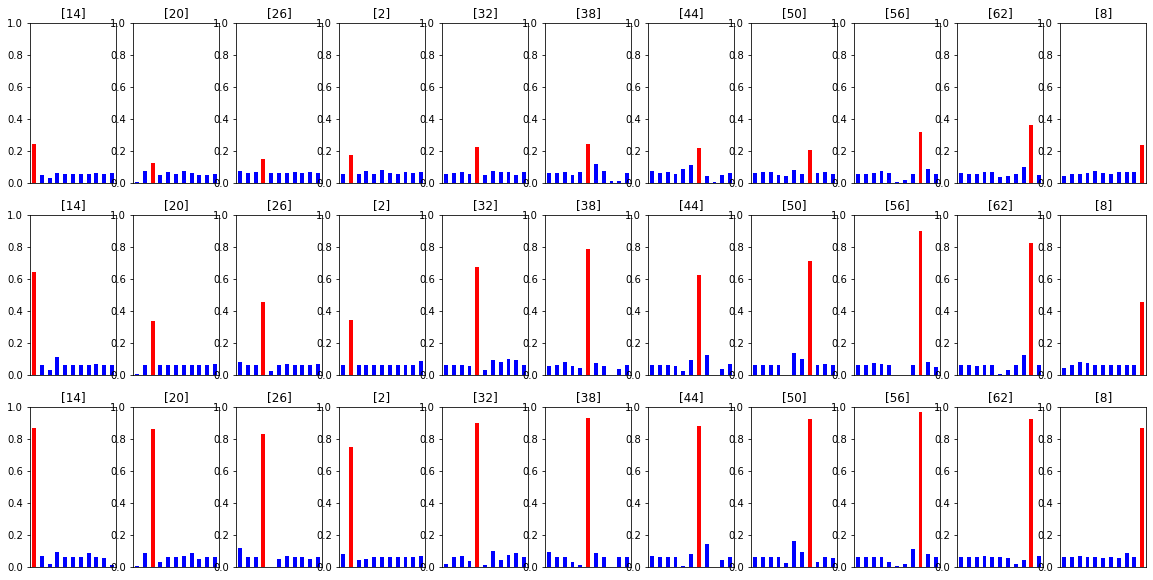

In [14]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

n_rows = len(df.groupby("num_examples_per_class_per_domain").size())
n_cols = len(df.groupby("source_domains").size())


domain_colors = {True: 'r', False: 'b'}
for i, ((num_examples_per_class_per_domain, name), row) in enumerate(df.iterrows()):
    # print(name)
    # print(num_examples_per_class_per_domain)
    # print(row)
    # adsf
    row = row.sort_index()
    ax = plt.subplot(n_rows,n_cols, i+1)
    ax.set_title("{}".format(name))
    ax.set_ylim([0.0, 1.0])
    
    source_indices = eval(name)
    row.plot(kind="bar", ax=ax, color=[domain_colors[int(domain) in source_indices] for domain in row.index])
    plt.xticks(rotation=45)
    ax = plt.gca()
    ax.axes.xaxis.set_visible(False)

Text(0, 0.5, 'Accuracy')

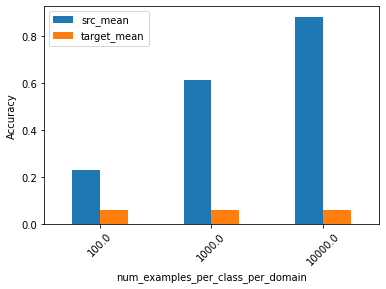

In [71]:
%matplotlib inline
df = df_orig
group = df.groupby(["num_examples_per_class_per_domain", "source_domains"])

new_df = pds.DataFrame()

for (n_ex,src), _df in group:
    src_doms = [str(s) for s in eval(src)]
    target_doms = list(set(_df.drop(columns=["experiment_name", "source_domains", "num_examples_per_class_per_domain"]).columns.tolist()) - set(src_doms))
        
    target_mean = _df[target_doms].mean(axis=1).mean()
    src_mean = _df[src_doms].mean(axis=1).mean()
    
    new_df = new_df.append(
        {
            "num_examples_per_class_per_domain": n_ex,
            "source_domains": src,
            "src_mean":src_mean,
            "target_mean":target_mean,
        }, ignore_index=True
    )

new_df = new_df.groupby("num_examples_per_class_per_domain")[["src_mean", "target_mean"]].mean()
new_df.plot(kind="bar")
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
